In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3

In [60]:
con = sqlite3.connect('../data/database.db')

OperationalError: unable to open database file

# Loan

In [3]:
df = pd.read_sql_query('SELECT * FROM loanDev', con)
df.head()

,id,accountId,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


* Categorical: id, accountId
* Dates: date, duration
* Numerical: amount

In [4]:
df.describe()

,id,accountId,amount,duration,payments,status
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,6205.658537,5982.085366,145308.621951,35.853659,4150.932927,0.719512
std,667.985675,3213.262492,105247.318098,16.734752,2193.620989,0.695541
min,4959.000000,2.000000,4980.000000,12.000000,319.000000,-1.000000
25%,5604.250000,3079.000000,68328.000000,24.000000,2368.750000,1.000000
50%,6227.500000,6032.000000,114804.000000,36.000000,3878.500000,1.000000
75%,6737.250000,8564.500000,198600.000000,48.000000,5907.750000,1.000000
max,7308.000000,11362.000000,538500.000000,60.000000,9689.000000,1.000000


status: Mean e std tendem para 1, provavelmente 1 significa que o empréstimo foi pago.

In [11]:
print(f"Unique duration values: {df['duration'].unique()}")
print(f"Unique ids: {df['id'].unique().size}")
print(f"Unique accountIds: {df['accountId'].unique().size}")

Unique duration values: [12 36 60 24 48]
Unique ids: 328
Unique accountIds: 328


<AxesSubplot:>

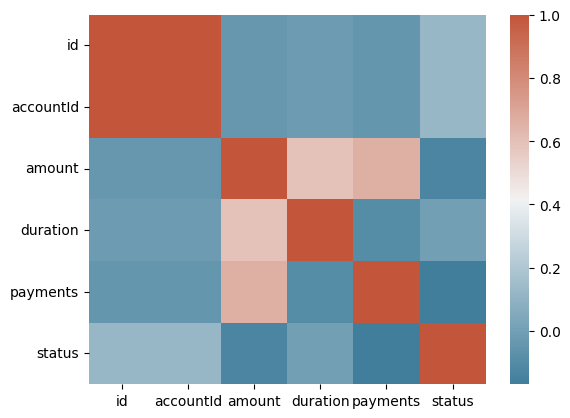

In [13]:
sns.heatmap(df.corr(), cmap=sns.diverging_palette(230, 20, as_cmap=True))

Análise: estes dados aparentam ser inúteis

<AxesSubplot:>

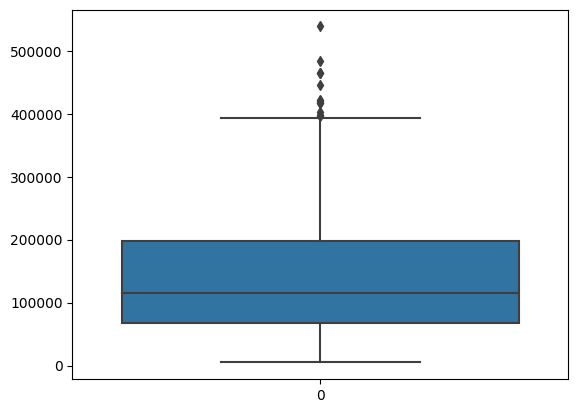

In [15]:
sns.boxplot(df['amount'])

<AxesSubplot:>

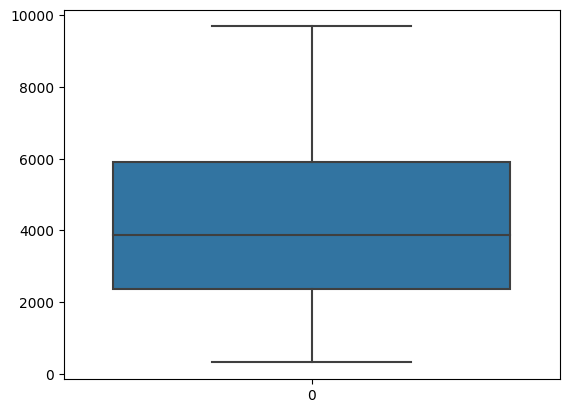

In [19]:
sns.boxplot(df['payments'])

In [23]:
df['monthlyPayment'] = df['amount']/df['duration']
df.head()

,id,accountId,date,amount,duration,payments,status,monthlyPayment
0,5314,1787,930705,96396,12,8033,-1,8033.0
1,5316,1801,930711,165960,36,4610,1,4610.0
2,6863,9188,930728,127080,60,2118,1,2118.0
3,5325,1843,930803,105804,36,2939,1,2939.0
4,7240,11013,930906,274740,60,4579,1,4579.0


<AxesSubplot:xlabel='duration', ylabel='count'>

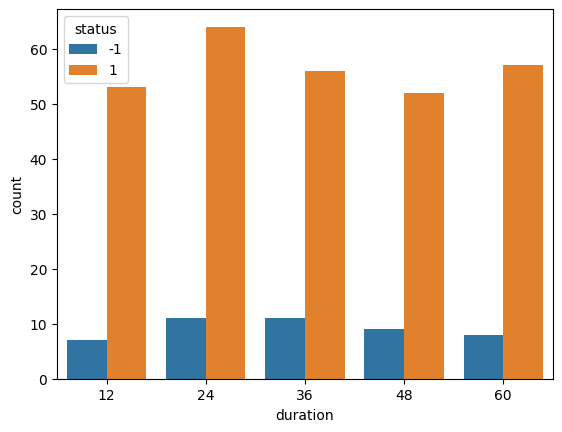

In [39]:
sns.countplot(df, x='duration', hue='status')

In [47]:
df['year'] = df['date'].transform(lambda x : x[:2])
df['month'] = df['date'].transform(lambda x: x[2:4])
df['yearMonth'] = df['date'].transform(lambda x : x[:4])
df.head()

,id,accountId,date,amount,duration,payments,status,monthlyPayment,year,yearMonth,month
0,5314,1787,930705,96396,12,8033,-1,8033.0,93,9307,07
1,5316,1801,930711,165960,36,4610,1,4610.0,93,9307,07
2,6863,9188,930728,127080,60,2118,1,2118.0,93,9307,07
3,5325,1843,930803,105804,36,2939,1,2939.0,93,9308,08
4,7240,11013,930906,274740,60,4579,1,4579.0,93,9309,09


<AxesSubplot:xlabel='yearMonth', ylabel='count'>

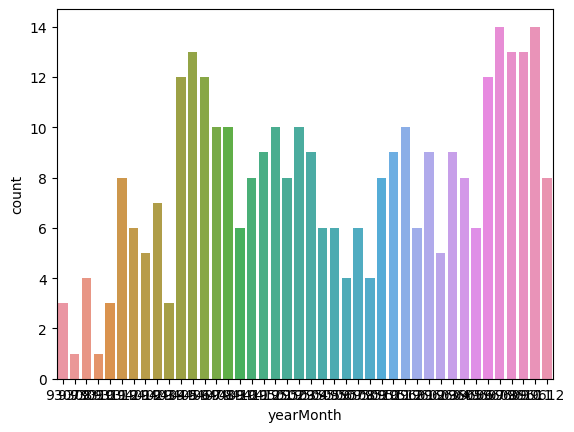

In [51]:
sns.countplot(df, x='yearMonth')

<AxesSubplot:xlabel='year', ylabel='count'>

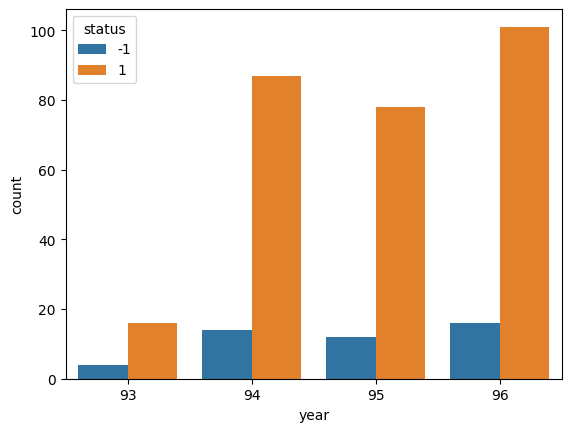

In [49]:
sns.countplot(df, x='year', hue='status')

<AxesSubplot:xlabel='month', ylabel='count'>

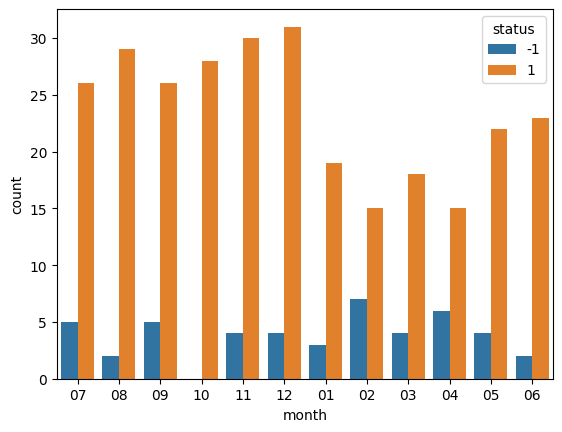

In [50]:
sns.countplot(df, x='month', hue='status')

<AxesSubplot:xlabel='amount', ylabel='Count'>

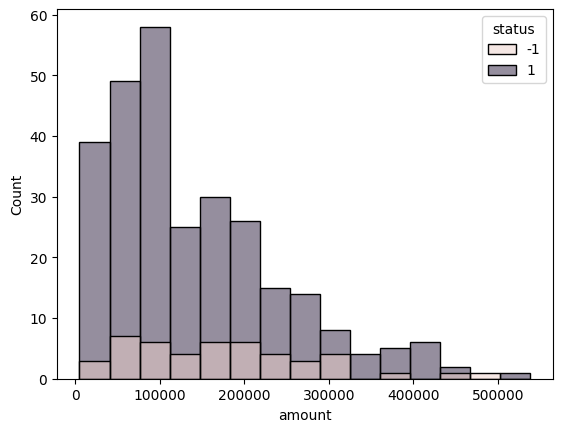

In [62]:
sns.histplot(df, x='amount', hue='status')